In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
m1 = pd.Series((1,2,3))

In [4]:
m1


0    1
1    2
2    3
dtype: int64

In [5]:
data = pd.read_csv("mnist_train_small.csv")

In [6]:
data.head()

,Unnamed: 0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.tail()

,Unnamed: 0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
7995,7995,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7996,7996,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7997,7997,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7998,7998,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7999,7999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
num = data.values

In [9]:
X = num[:,2:]


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
y = num[:,1]

In [12]:
y

array([0, 4, 1, ..., 5, 4, 0])

In [13]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
img = X[1024].reshape(28,28)

In [16]:
img.shape

(28, 28)

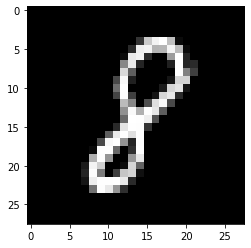

In [17]:
plt.imshow(img, cmap="gray")

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [79]:
model = KNeighborsClassifier(10)

In [80]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [81]:
model.score(X_test,y_test)

0.9371212121212121

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("mnist_train_small.csv")

In [4]:
num = data.values

In [5]:
X = num[:,2:]
y = num[:,1]

In [6]:
pca = PCA()

In [7]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.components_.shape

(784, 784)

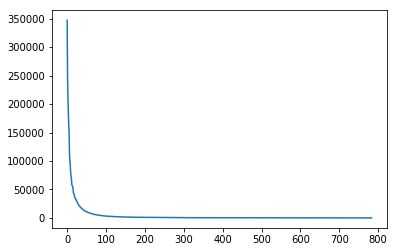

In [47]:
plt.plot(pca.explained_variance_)
# pca.explained_variance_

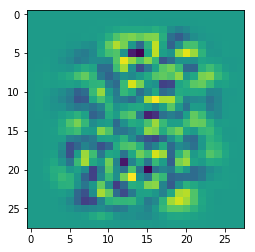

In [49]:
plt.imshow(pca.components_[100].reshape(28,28))

In [50]:
X_mod = pca.transform(X)

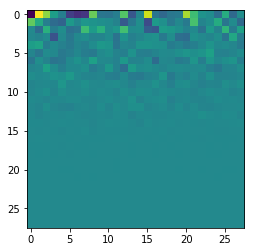

In [51]:
plt.imshow(X_mod[1024].reshape(28,28))

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
m1 = KNeighborsClassifier(5)

In [55]:
m1.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
m1.score(X,y)

0.966125

In [57]:
pca = PCA(n_components = 100)

In [59]:
pca.fit(X,y)
X_mod = pca.transform(X)

In [60]:
m2 = KNeighborsClassifier(5)

In [61]:
m2.fit(X_mod,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
m2.score(X_mod,y)

0.9705

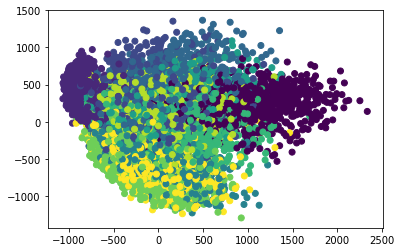

In [64]:
plt.scatter(X_mod[:,0],X_mod[:,1],c=y)

In [78]:
X_select = X_mod[y>7]
y_select = y[y>7]
y_select.shape

(1548,)

In [79]:
m3 = KNeighborsClassifier(5)

In [80]:
m3.fit(X_select,y_select)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
m3.score(X_select,y_select)

0.9896640826873385

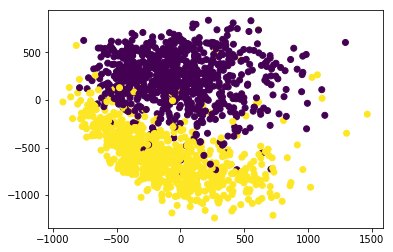

In [82]:
plt.scatter(X_select[:,0],X_select[:,1],c=y_select)